# Exploratory Data Analysis

In [1]:
# import data set

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

loan_df = pd.read_csv('C:/Users/tarad/OneDrive/Documents/USD_GRAD_SCHOOL-C/ADS502_Applied_Data_Mining/FinalProject/loan_approval_dataset.csv')

print(loan_df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

## Missing Values

In [2]:
# remove leading and trailing whitespaces from column names
loan_df.rename(columns=lambda x: x.strip(), inplace=True)


# checking for missing values
missing_values = loan_df.isnull().sum()

missing_values

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

## Data Types

In [3]:
# data types
data_types = loan_df.dtypes

data_types

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

## Exploring Categorical Vaiables

In [4]:
# counts of categorical

education_counts = loan_df['education'].value_counts()
self_employed_counts = loan_df['self_employed'].value_counts()
loan_status_counts = loan_df['loan_status'].value_counts()

print("The education counts:")
print(education_counts)
print("The self employed counts:")
print(self_employed_counts)
print("The loan status counts:")
print(loan_status_counts)

The education counts:
 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64
The self employed counts:
 Yes    2150
 No     2119
Name: self_employed, dtype: int64
The loan status counts:
 Approved    2656
 Rejected    1613
Name: loan_status, dtype: int64


## Exploring Numerical Variables

In [5]:
# summary statistics of numerical variables
summary_stats = loan_df.describe()

summary_stats

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Outlier Analysis with Visualizations

#### Histogram

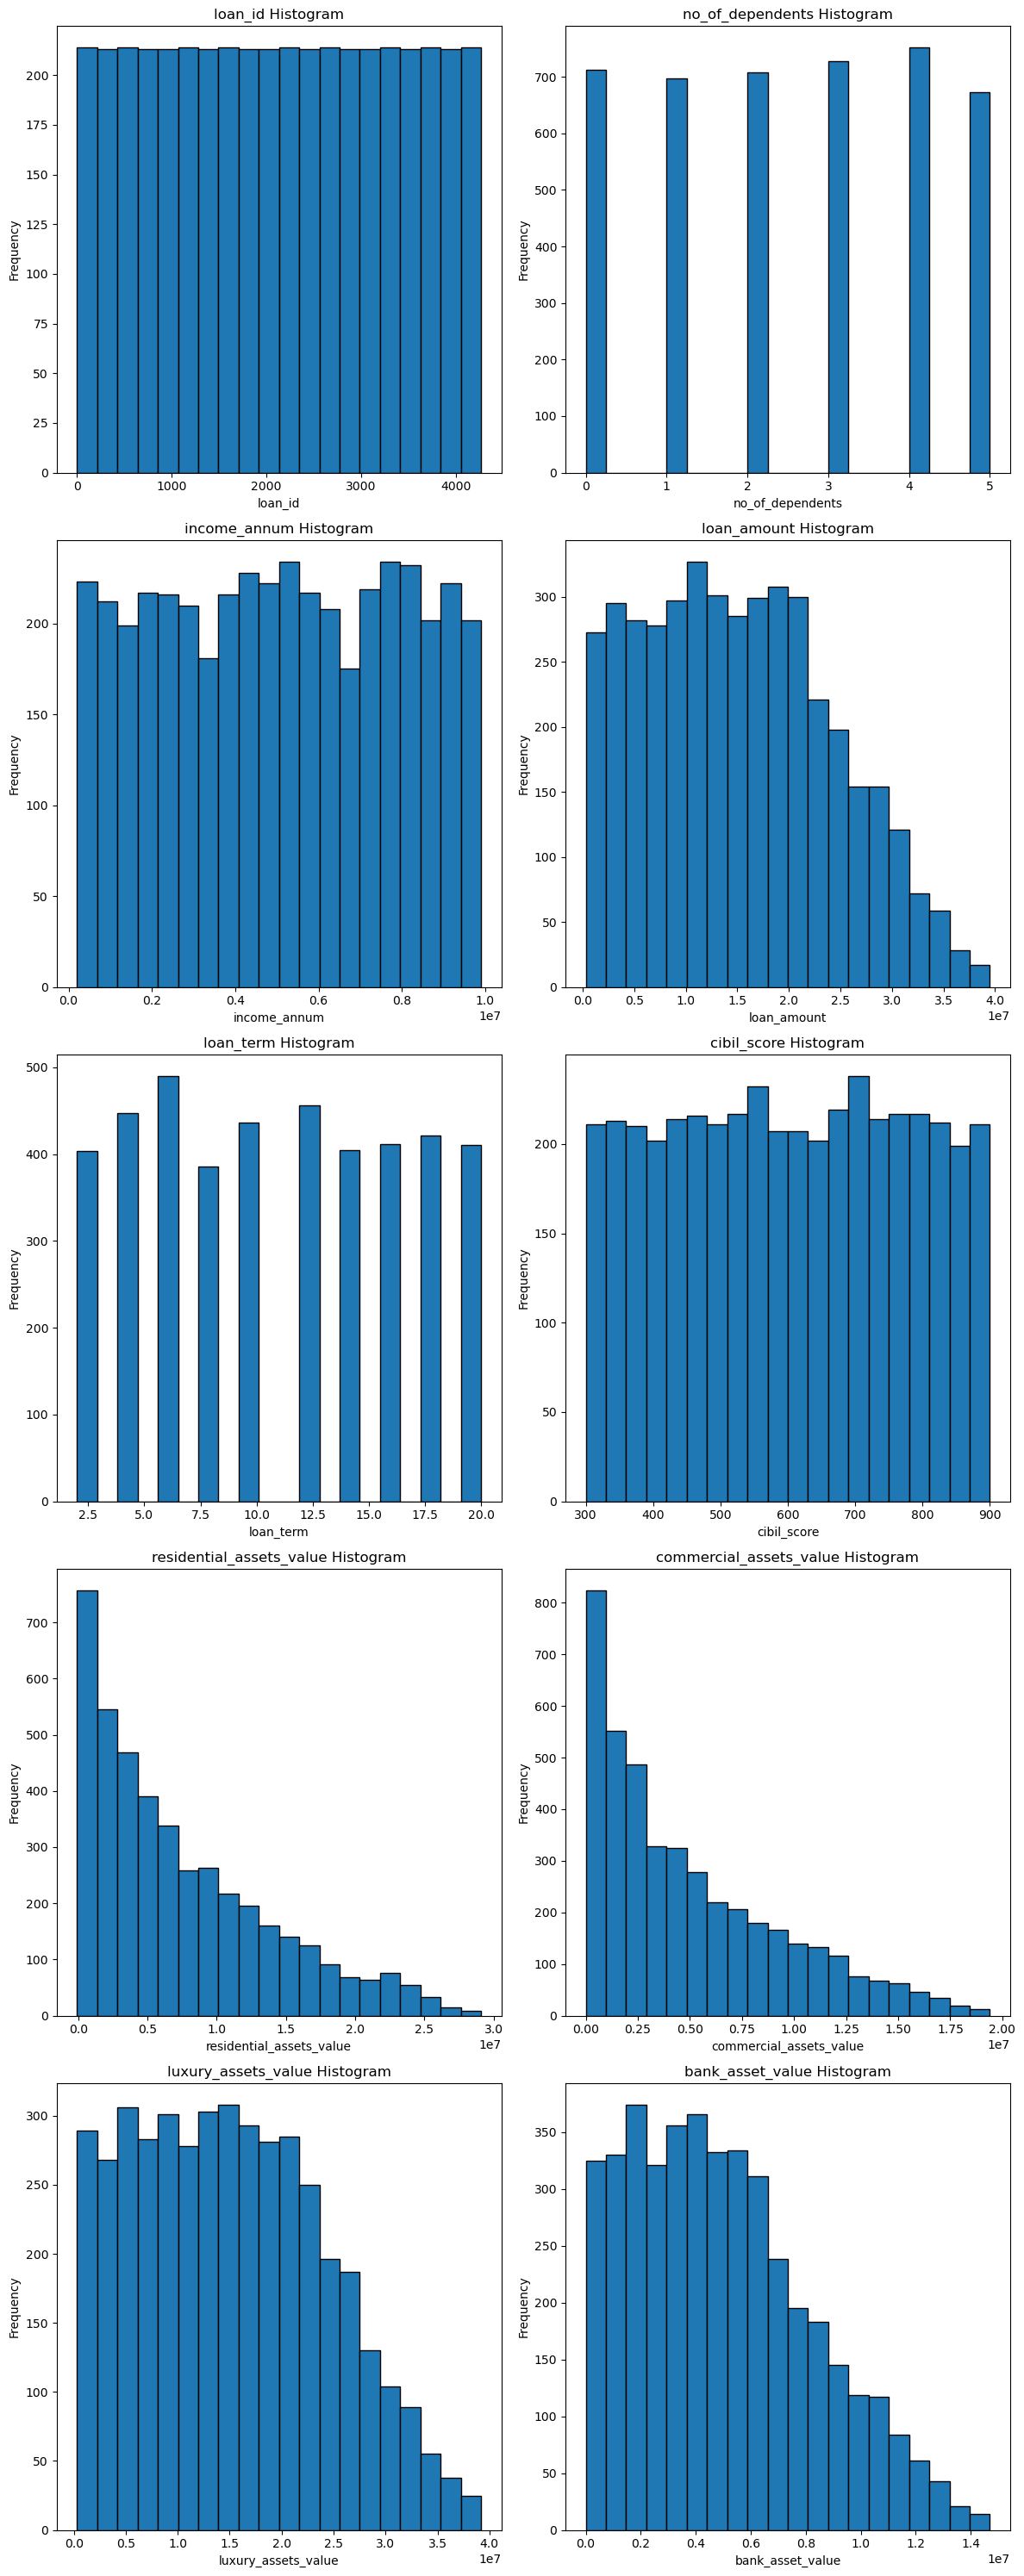

In [6]:
# histogram
numerical_columns = loan_df.select_dtypes(include=['float64', 'int64']).columns
num_numerical = len(numerical_columns)

# number of rows and columns for subplots
num_rows = (num_numerical - 1) // 2 + 1
num_cols = 2

plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.hist(loan_df[column], bins=20, edgecolor='k')
    plt.title(column + " Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Bar Charts

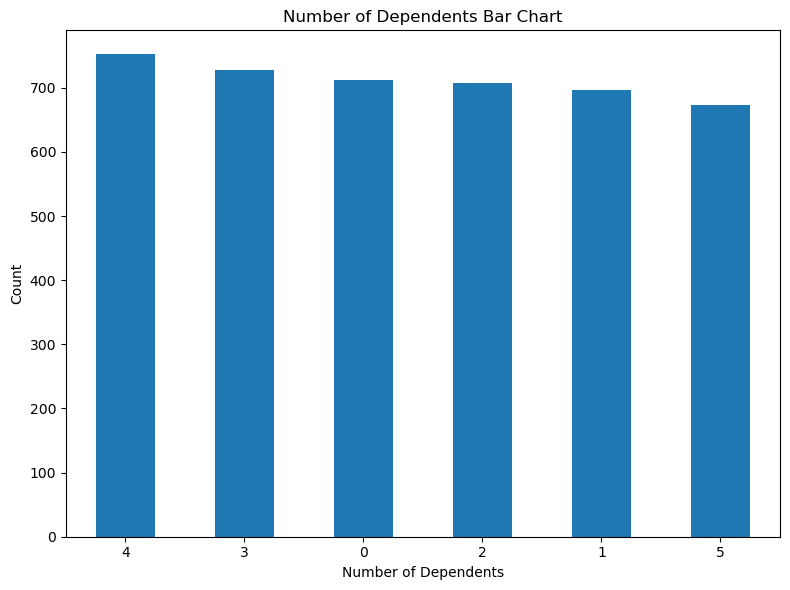

In [7]:
# bar charts for number of dependents
plt.figure(figsize=(8, 6))
loan_df['no_of_dependents'].value_counts().plot(kind='bar')
plt.title("Number of Dependents Bar Chart")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep x-axis labels upright

plt.tight_layout()
plt.show()

#### Box Plots

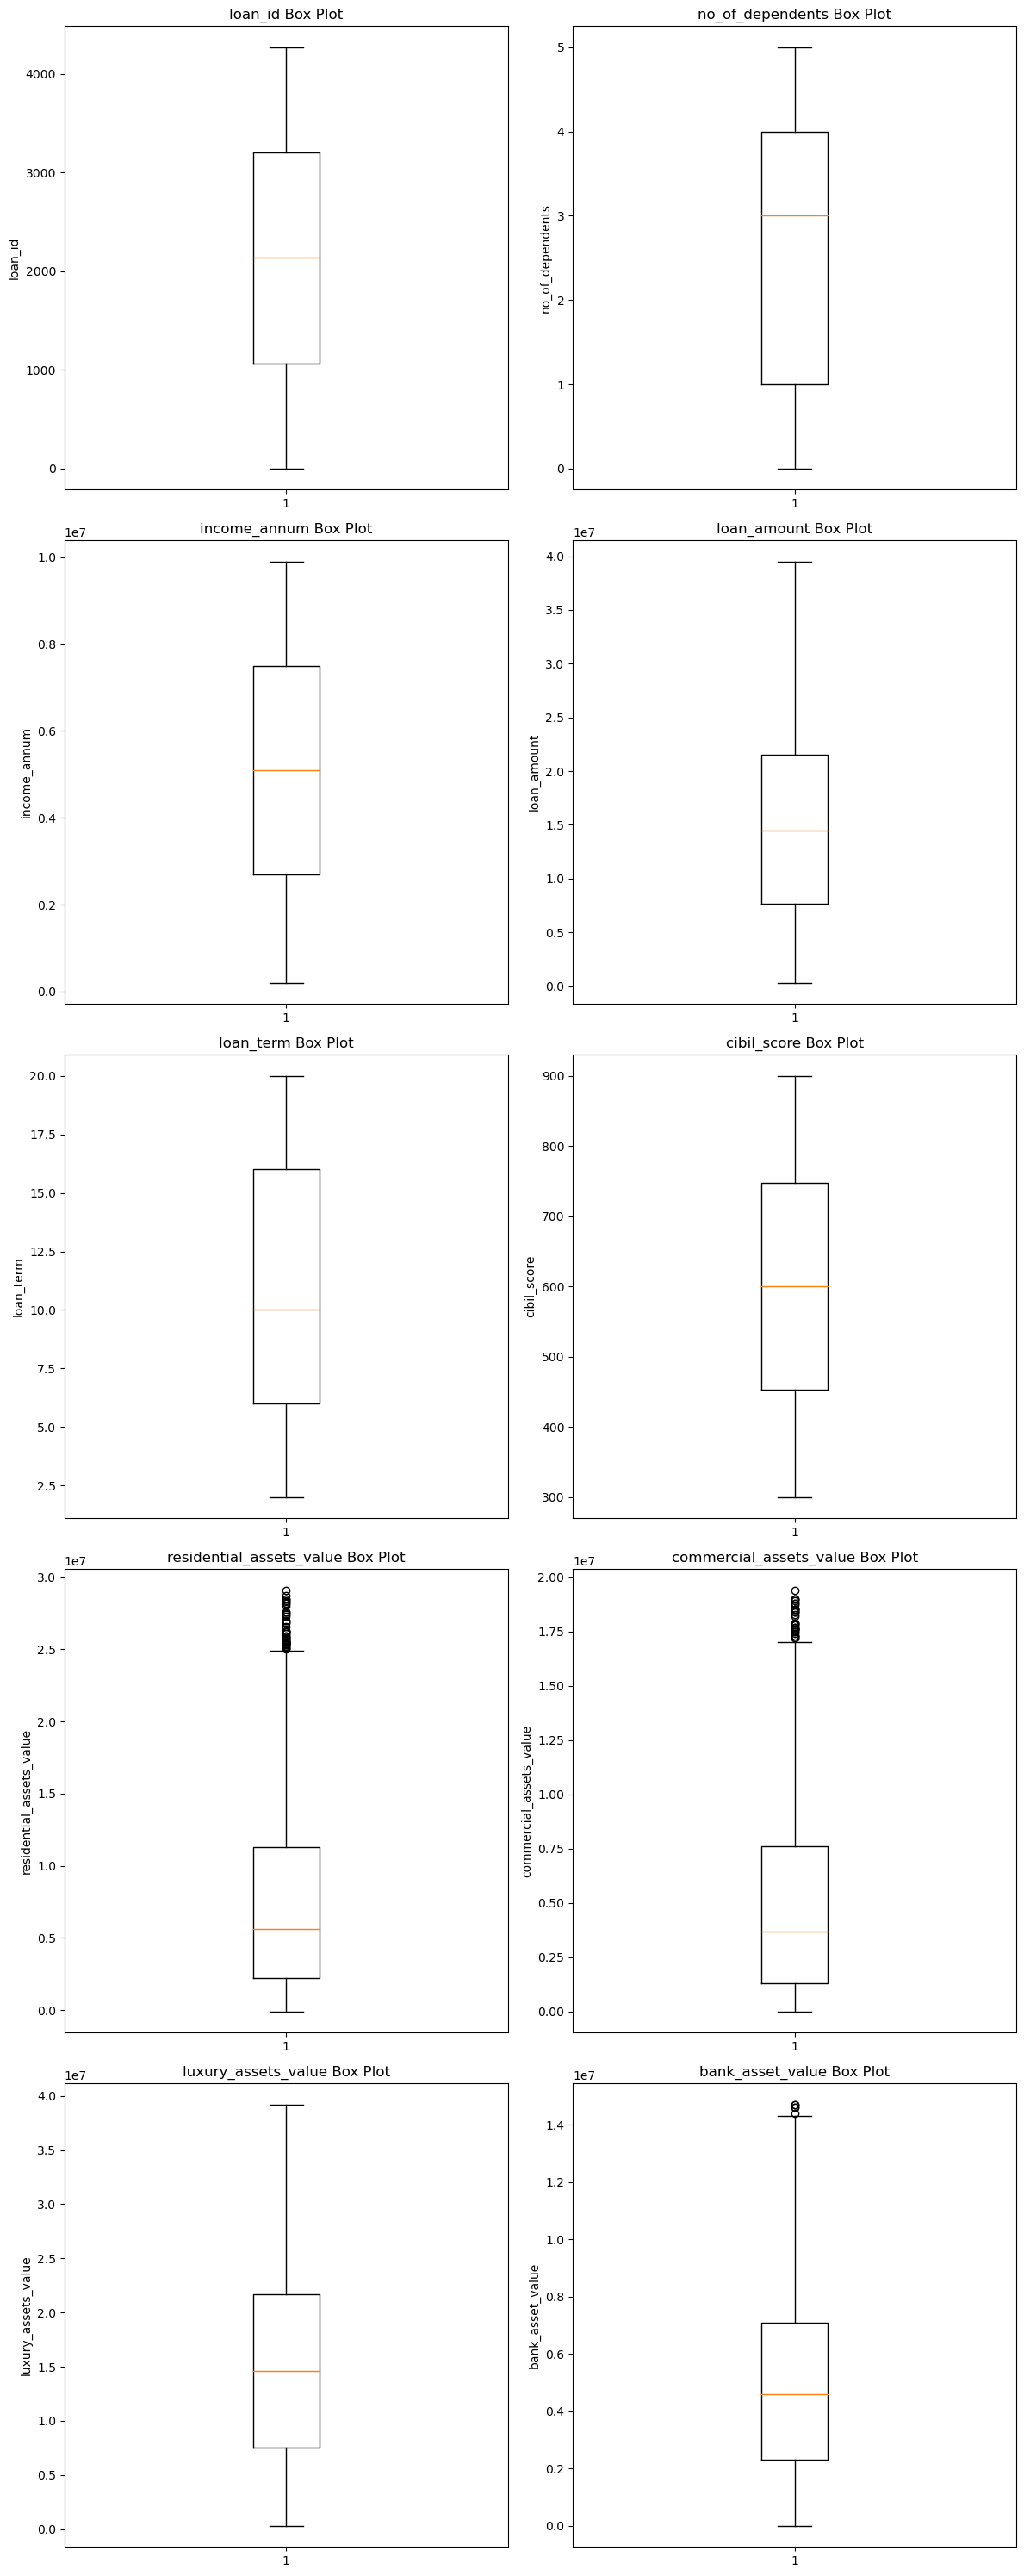

In [15]:
# box plots
plt.figure(figsize=(12, 6 * num_rows))

for idx, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.boxplot(loan_df[column])
    plt.title(column + " Box Plot")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Correlation  

In [10]:
# correlation matrix
correlation_matrix = loan_df.corr(numeric_only=True) 
correlation_matrix

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


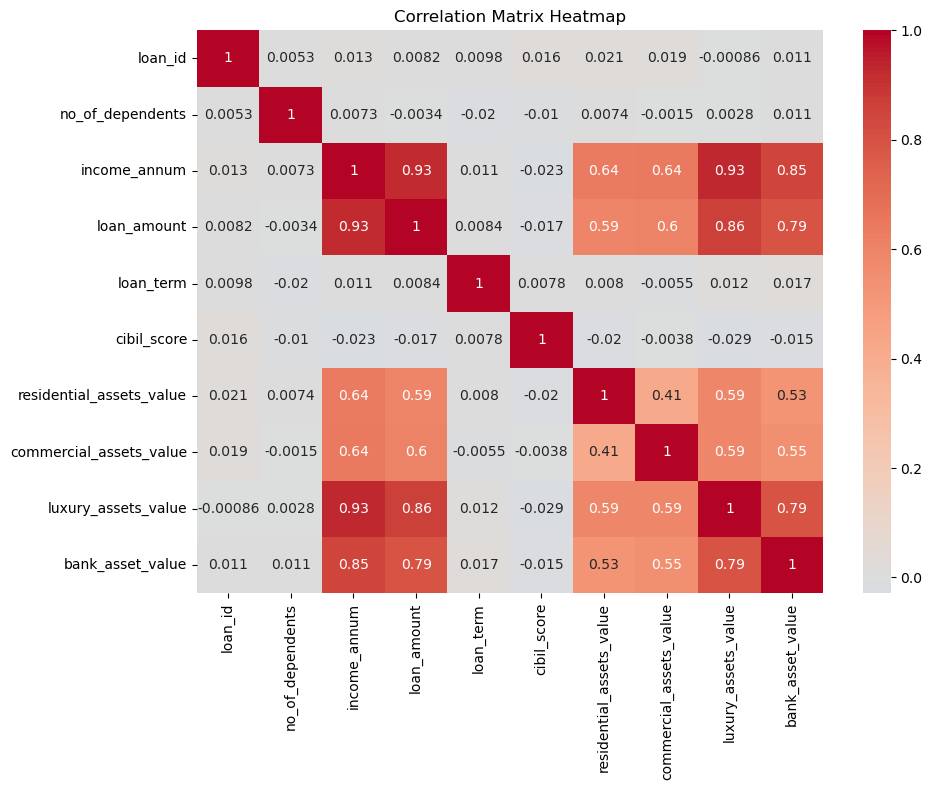

In [11]:
# heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")

plt.tight_layout()
plt.show()